# EDA Shopping Behavior

In [46]:
!pip install geopy

In [47]:
!pip install matplotlib -q
!pip install seaborn -q

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

font_path = 'c:\\Windows\\Fonts\\GULIM.TTC' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties (fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용

plt.rc('axes', unicode_minus=False)

### 01. 데이터 수집 및 로드

In [49]:
shopping_df = pd.read_csv('../data/shopping_behavior_updated.csv')
shopping_df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### 02. 데이터구조 및 변수 이해

In [50]:
print(shopping_df.shape)
print(shopping_df.dtypes)
shopping_df.info()

(3900, 18)
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null  

### 03. 데이터 요약 및 기술통계

In [51]:
# 수치형 컬럼만 선택
numeric_df = shopping_df.select_dtypes(include=['number'])

# 범주형 컬럼만 선택
categorical_df = shopping_df.select_dtypes(include=['object', 'category'])

# 확인
display(numeric_df.describe())
display(categorical_df.describe())

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   

       Payment Method Frequency of Purchases  
count            3900                   3900  
unique              6                      7  
top            PayPal         Every 3 Months  
freq              677                    584

### 04. 결측치, 이상치

In [52]:
shopping_df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [53]:
shopping_df.duplicated('Customer ID').sum()

np.int64(0)

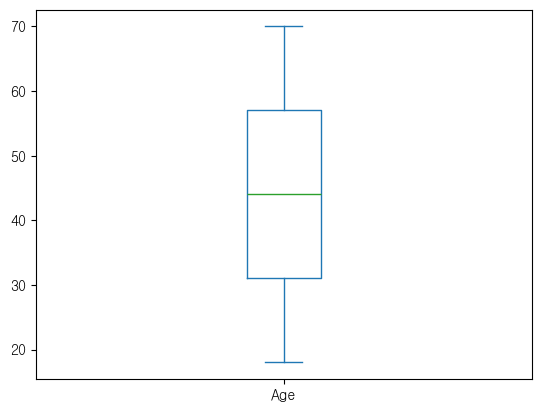

In [54]:
shopping_df['Age'].plot(kind='box')
plt.show()

### 05. 변수분포 시각화

### 분석 전략
- 나이별과 그외 다양한 요소를 매칭하여 유리한 판매전략을 도출하는 것이 본 분석의 목적입니다.

- 카테고리별 구매수, 나이별 성별별 구매수, 나이별 구매빈도수별 구매수, 서부지역의 나이별 구매빈도수별 구매수 등 비교군을 통해 판매전략을 구축하는 것이 목표이다.

In [55]:
shopping_df = pd.read_csv('../data/shopping_behavior_updated.csv')

season_order = ['Spring', 'Summer', 'Fall', 'Winter']



C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\2362342759.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Category'])


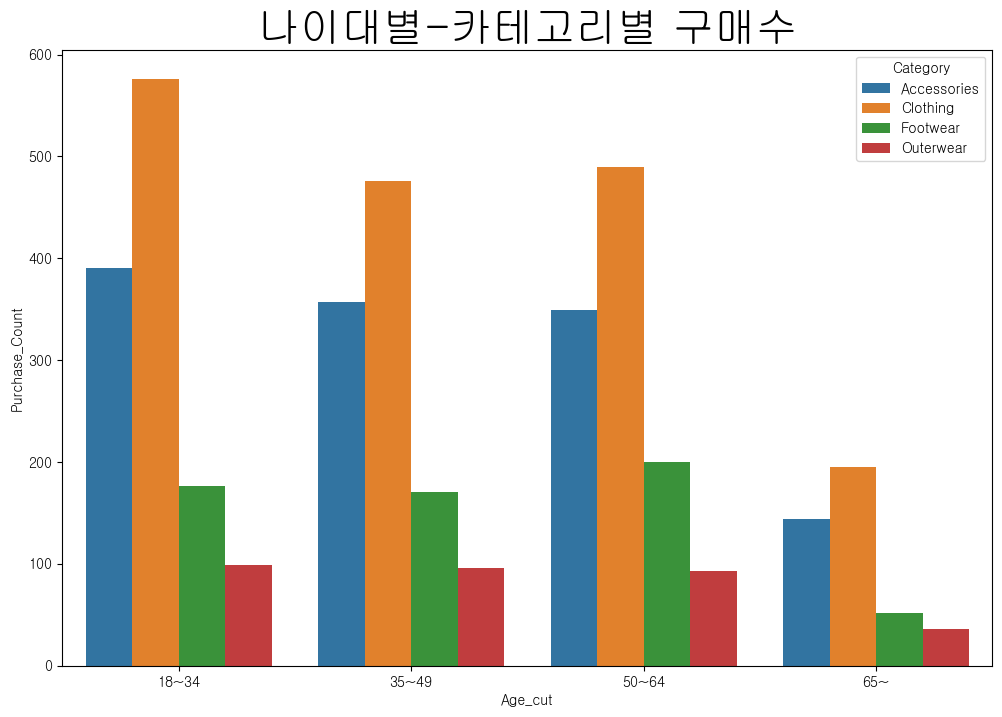

In [93]:
plt.figure(figsize=(12, 8))




max_age =shopping_df['Age'].max()

shopping_df['Age_cut'] = pd.cut(shopping_df['Age'],
                                bins = [17, 34, 49, 64, max_age],
                                labels= ['18~34', '35~49', '50~64', '65~'])


age_category_df = (
    shopping_df.groupby(['Age_cut', 'Category'])
    .size()
    .reset_index(name='Purchase_Count')
)
# .size()는 각 그룹의 “행 개수(row count)”를 반환합니다.


plt.title('나이대별-카테고리별 구매수', fontsize=30)


sns.barplot(data=age_category_df, x='Age_cut', y='Purchase_Count', hue='Category')

plt.show()


### 나이대별 카테고리별 구매수는 옷, 악세서리, 풋웨어, 아웃웨어 순

C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\851251035.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Color', 'Gender'])


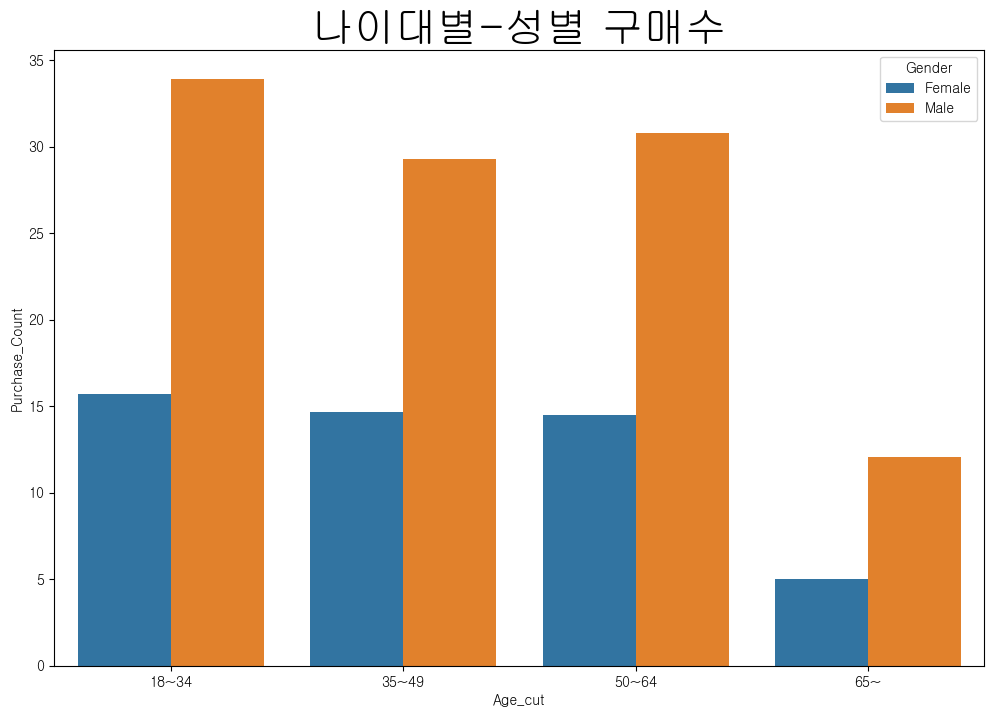

In [94]:
plt.figure(figsize=(12,8))


age_color_gender_df = (
    shopping_df.groupby(['Age_cut', 'Color', 'Gender'])
    .size()
    .reset_index(name='Purchase_Count')
)

plt.title('나이대별-성별 구매수', fontsize=30)


sns.barplot(data=age_color_gender_df, x='Age_cut', y='Purchase_Count', hue='Gender', errorbar=None)

plt.show()

### 결과 : 남성의 구매율이 여성보다 높다

### 06. 변수간 관계 시각화

C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\949960599.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Frequency of Purchases'])


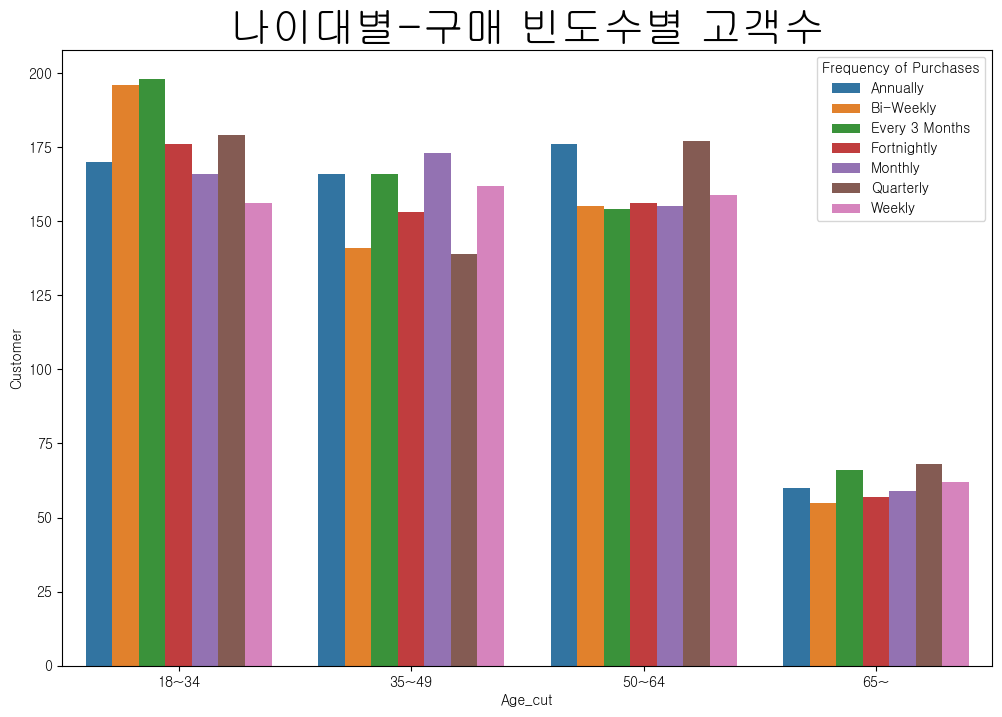

In [95]:
plt.figure(figsize=(12,8))

age_fre_df = (
    shopping_df.groupby(['Age_cut', 'Frequency of Purchases'])
    .size()
    .reset_index(name='Customer')
)

plt.title('나이대별-구매 빈도수별 고객수', fontsize=30)

sns.barplot(data=age_fre_df, x='Age_cut', y='Customer', hue='Frequency of Purchases')


plt.show()

### 나이대별-구매 빈도수별 고객수는 평이하다

### 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\3191505752.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Frequency of Purchases'])


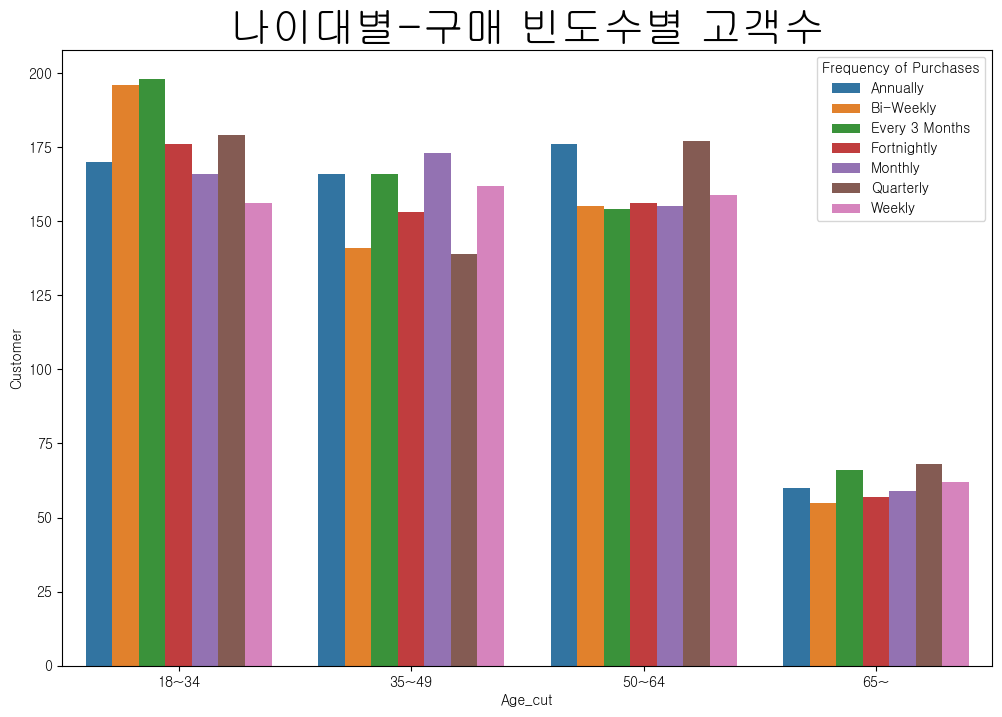

C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\3191505752.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Frequency of Purchases', 'Region'])


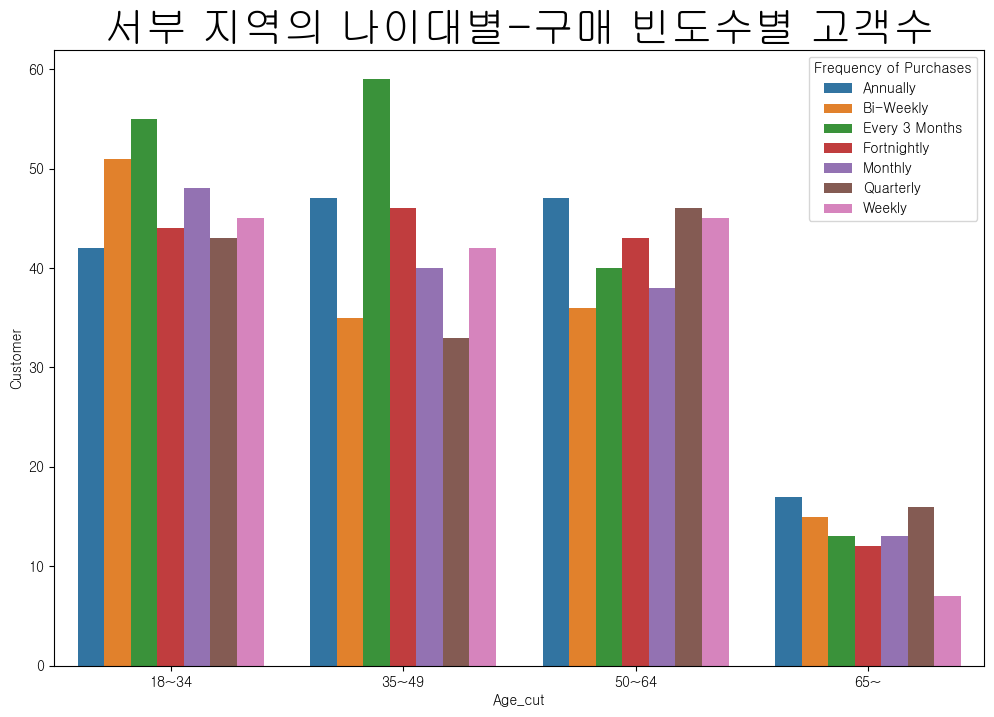

In [87]:
plt.figure(figsize=(12,8))

age_fre_df = (
    shopping_df.groupby(['Age_cut', 'Frequency of Purchases'])
    .size()
    .reset_index(name='Customer')
)

plt.title('나이대별-구매 빈도수별 고객수', fontsize=30)

sns.barplot(data=age_fre_df, x='Age_cut', y='Customer', hue='Frequency of Purchases')


plt.show()


max_age =shopping_df['Age'].max()

def location_separate(location):

        EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
        CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
                
        if location in EAST_STATES :
                return '동부'
        elif location in CENTRAL_STATES :
                return '중부'
        else:
                return '서부'
        
        
# 서부 (West)   Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming
        

shopping_df['Region'] = shopping_df['Location'].apply(location_separate)



plt.figure(figsize=(12,8))



age_fre_region_df = (
        shopping_df.groupby(['Age_cut', 'Frequency of Purchases', 'Region'])
        .size()
        .reset_index(name='Customer')
)


age_fre_west_df = age_fre_region_df[age_fre_region_df['Region'] == '서부']

plt.title('서부 지역의 나이대별-구매 빈도수별 고객수', fontsize=30)



sns.barplot(data=age_fre_west_df, x='Age_cut', y='Customer', hue='Frequency of Purchases')


plt.show()




### 서부지역의 나이대별-구매 빈도수별 고객수

-서부가 통합보다 35~49세 구간에서 3달마다 옷을 사는 비율이 크다.

-65세 이상에서 서부가 통합에 비해, 비율이 절반 수준이다.

C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\2811375487.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Frequency of Purchases', 'Region', 'Gender'])


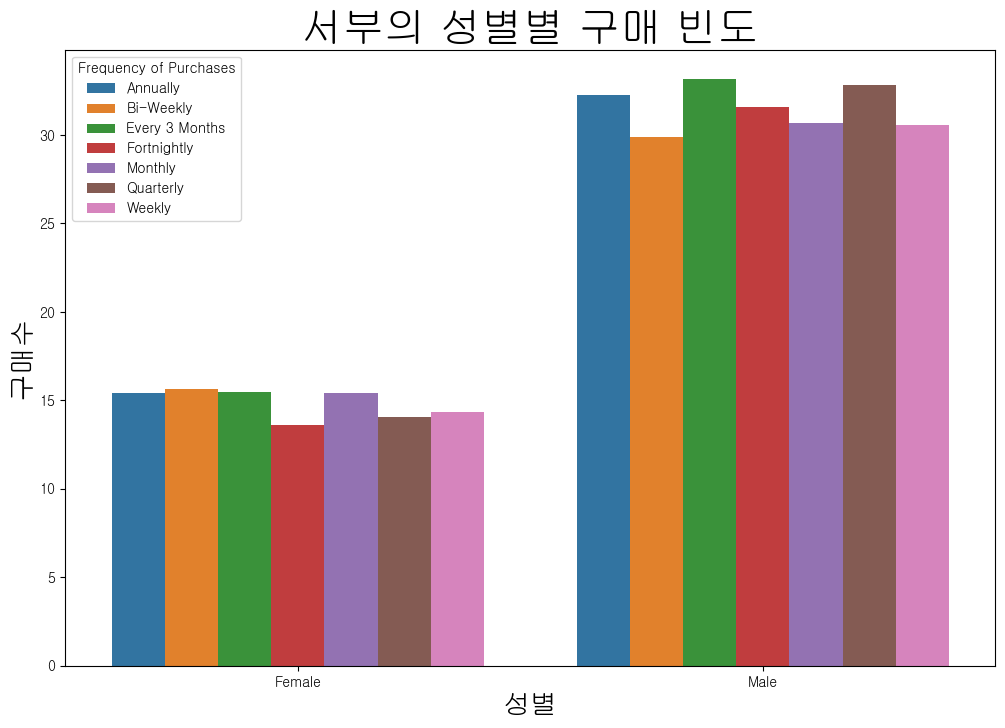

In [97]:
def location_separate(location):

        EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
        CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
                
        if location in EAST_STATES :
                return '동부'
        elif location in CENTRAL_STATES :
                return '중부'
        else:
                return '서부'
        
        
# 서부 (West)   Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming
        

shopping_df['Region'] = shopping_df['Location'].apply(location_separate)

fre_region__gen_df = (
        shopping_df.groupby(['Age_cut', 'Frequency of Purchases', 'Region', 'Gender'])
        .size()
        .reset_index(name='Count')
)


plt.figure(figsize=(12, 8))

sns.barplot(
    data=fre_region__gen_df,
    x='Gender',
    y='Count',
    hue='Frequency of Purchases',
    errorbar=None
)

plt.title('서부의 성별별 구매 빈도', fontsize=30)
plt.xlabel('성별', fontsize=20)
plt.ylabel('구매수', fontsize=20)

plt.show()



### 서부의 성별별 구매빈도는 나이대와 달리, 큰 차이가 없다.


### 08. 데이터 전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

### 09. Feature Engineering
Feature(독립변수, 속성, 열) 가공

- 새로운 변수 생성
- 그룹핑 처리
- 편향개선
- 스케일링 (범위변경)

### 문자형 -> 수치형
1. 범주형 -> 수치값
2. one-hot encoding 해당하는 값만 1이 되도록 변경

### 새로운 변수, 그룹핑 처리
shopping_df['Age_cut'] = pd.cut(shopping_df['Age'],
                                bins = [17, 34, 49, 64, max_age],
                                labels= ['18~34', '35~49', '50~64', '65~'])
Age_cut -> 나이대별로 분류


age_category_df = (
    shopping_df.groupby(['Age_cut', 'Category'])
    .size()
    .reset_index(name='Purchase_Count')
)
Purchase_Count -> 구매수


age_fre_df = (
    shopping_df.groupby(['Age_cut', 'Frequency of Purchases'])
    .size()
    .reset_index(name='Customer')
)
Customer -> 손님수 => 결측, 중복이 없으니 손님수로 활용가능


shopping_df['Region'] = shopping_df['Location'].apply(location_separate)
Region -> 지역별로 나눈 컬럼

fre_region__gen_df = (
        shopping_df.groupby(['Age_cut', 'Frequency of Purchases', 'Region', 'Gender'])
        .size()
        .reset_index(name='Count')
)
Count -> 구매수와 동일

custom_color_palette -> 색깔을 매칭 용도로 k : v 형식으로 담고 있음





C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\4265330592.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Color', 'Gender', 'Season', 'Region', 'Location'])


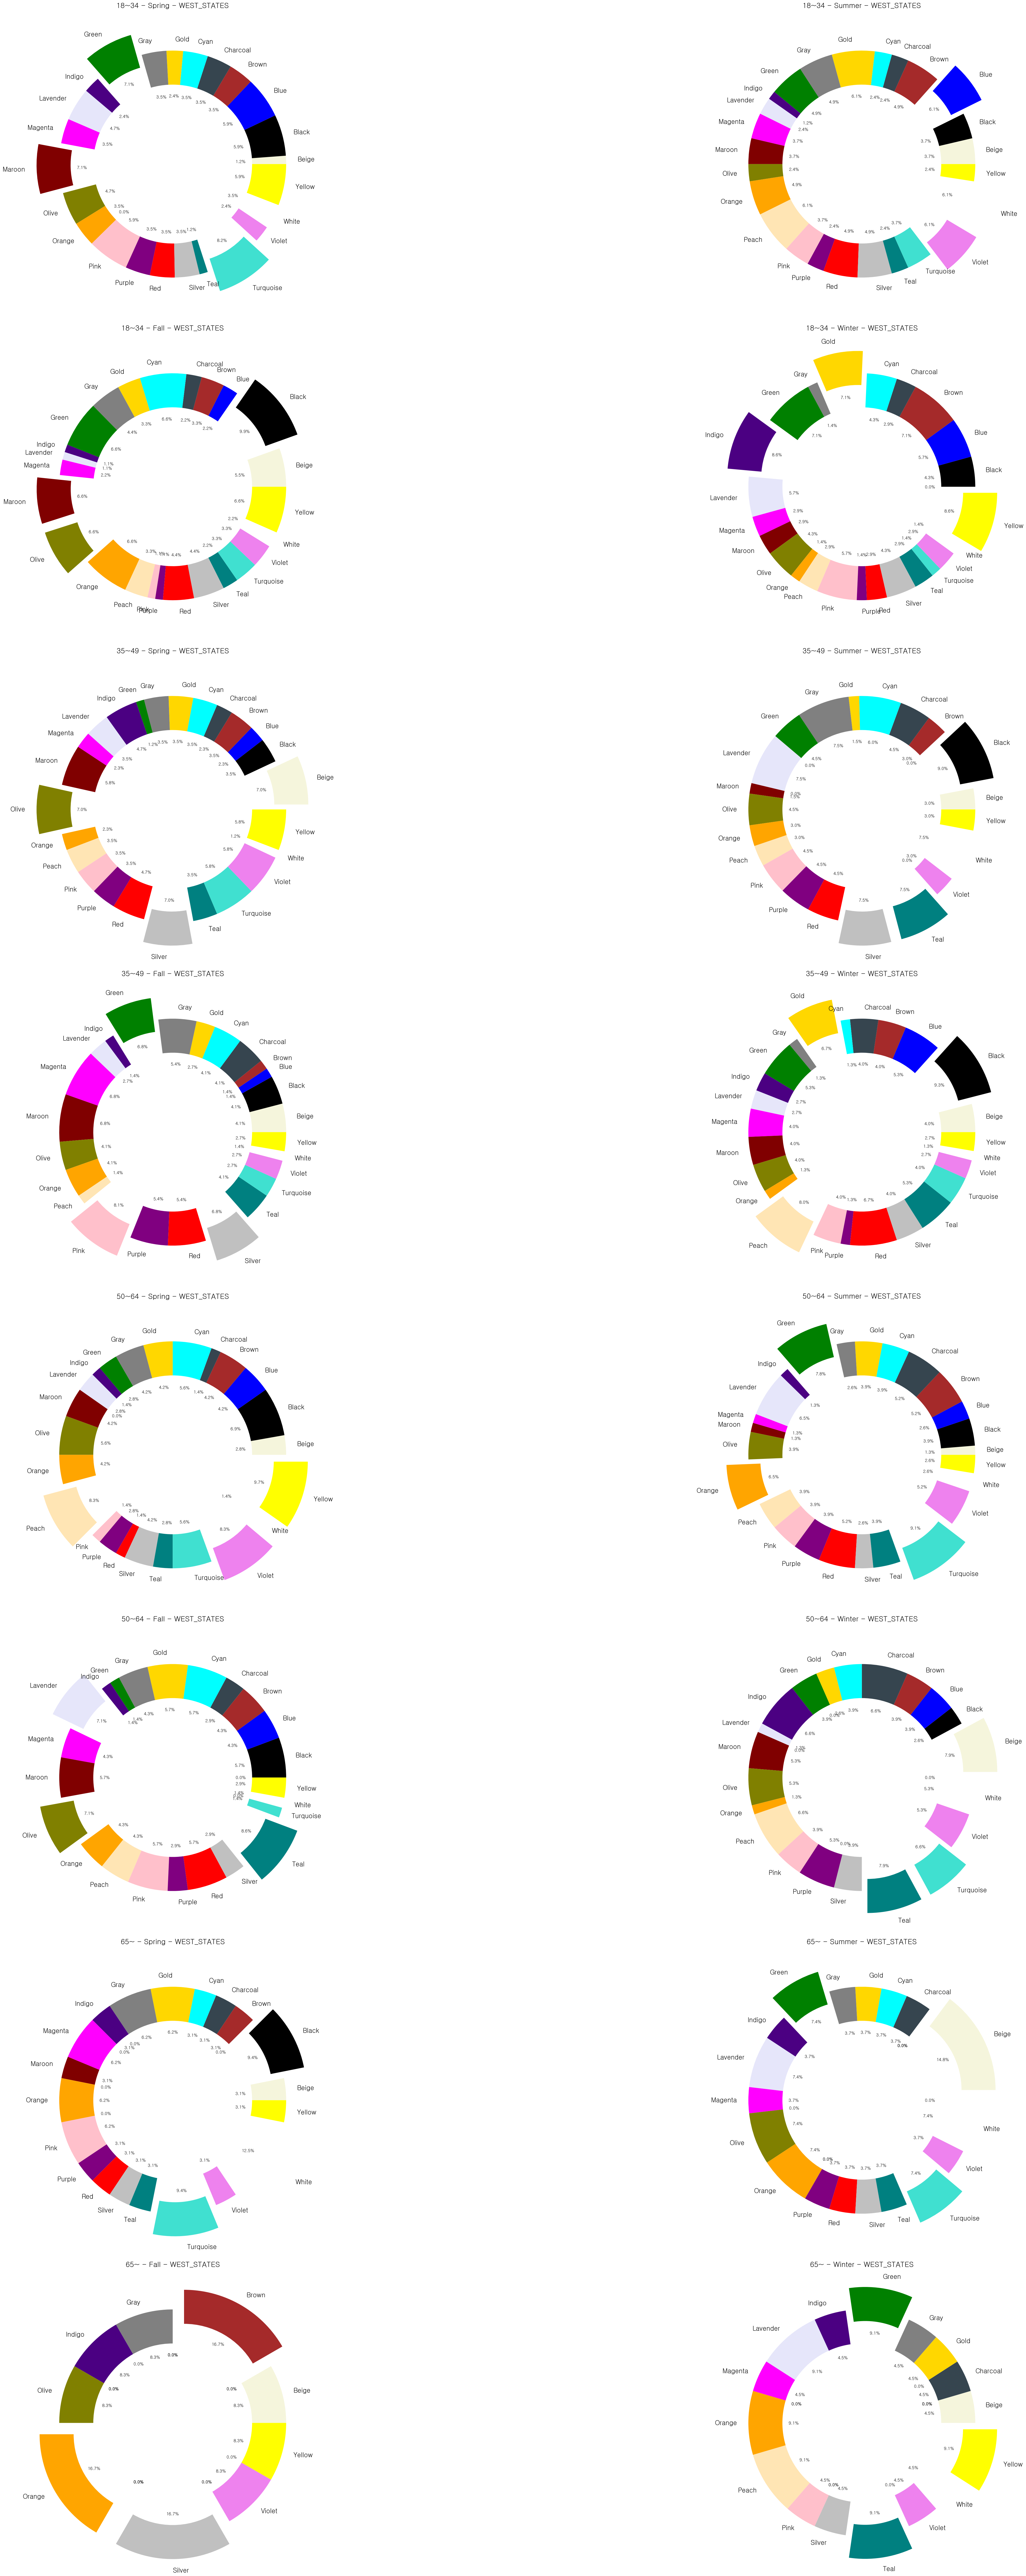

In [91]:
max_age =shopping_df['Age'].max()

def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
            return '동부'
    elif location in CENTRAL_STATES :
            return '중부'
    else:
            return '서부'
        
        
# 서부 (West)   Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming
        

shopping_df['Region'] = shopping_df['Location'].apply(location_separate)

# west_df = shopping_df[shopping_df['Region']=='서부'].copy()




eastList = ['Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia']



shopping_df['Age_cut'] = pd.cut(shopping_df['Age'],
                                bins = [17, 34, 49, 64, max_age],
                                labels= ['18~34', '35~49', '50~64', '65~'])


age_color_gender_season_df = (
    shopping_df.groupby(['Age_cut', 'Color', 'Gender', 'Season', 'Region', 'Location'])
    .size()
    .reset_index(name='Color_Count')
)



custom_color_palette = {
    
    'Beige'     :   '#F5F5DC',
    'Black'     :   'Black',
    'Blue'      :   'Blue',
    'Brown'     :   '#A52A2A',
    'Charcoal'  :   '#36454F',
    'Cyan'      :   'Cyan',
    'Gold'      :   'Gold',
    'Gray'      :   'Gray',
    'Green'     :   'Green',
    'Indigo'    :   '#4B0082',
    'Lavender'  :   '#E6E6FA',
    'Magenta'   :   'Magenta',
    'Maroon'    :   '#800000',
    'Olive'     :   'Olive',
    'Orange'    :   'Orange',
    'Peach'     :   '#FFE5B4',
    'Pink'      :   'Pink',
    'Purple'    :   'Purple',
    'Red'       :   'Red',
    'Silver'    :   '#C0C0C0',
    'Teal'      :   'Teal',
    'Turquoise' :   '#40E0D0',
    'Violet'    :   'Violet',
    'White'     :   'White',
    'Yellow'    :   'Yellow'
        
    
    
}




age_order = ['18~34', '35~49', '50~64', '65~']
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize = (100, 100))

plot_idx = 1

for age in age_order:
    for season in season_order:
        age_season_df = age_color_gender_season_df[(age_color_gender_season_df['Age_cut'] == age) &
                                                (age_color_gender_season_df['Season'] == season) & (age_color_gender_season_df['Region'] == '서부')].dropna(subset=['Age_cut', 'Color', 'Gender', 'Season', 'Color_Count'])
        
        if age_season_df.empty:
            continue
        
        # 색상 합계 -> 색깔 개수, 라벨 종류 둘 다 중복 존재
        
        

        
        
        values = age_season_df['Color_Count'] 
        labels = age_season_df['Color'] 
        colors = age_season_df.groupby('Color')['Color_Count'].sum()
        
        #colors = age_season_df.groupby('Color')['Color_Count'].sum()
        
        # values = colors.values
        # labels = colors.index
        
        colorList = [custom_color_palette[color] for color in colors.index]

        
        
        top3_idx = np.argsort(colors.values)[-3:]

        top3_values = colors.values[top3_idx]

        top3_percent = top3_values/colors.sum() * 100

        # explode → 조각마다 얼마나 밖으로 튀어나오게 할지 지정
        # explode는 리스트 형태로 넣습니다.
        # 
        explode = [0.2 if i in top3_idx else 0 for i in range(len(colors.values))]
        
        
        
        plt.subplot(8, 2, plot_idx)
        
        
        
        wedges, texts, autotexts = plt.pie(colors.values, autopct='%1.1f%%', colors=colorList,
        wedgeprops={'width' : 0.3}, explode=explode, labeldistance=1.1,
        labels=[label if value > 0 else '' for label, value in zip(colors.index, colors.values)])
        # colors.index, colors.values 2개의 리스트를 쌍으로 묶어서
        # 각각의 요소를 label과 value에 집어넣겠다.
        # colors.values가 0 보다 크면 label 표시, 아니면 빈문자열('')이다. 
        
        # 라벨(색상 이름) / 퍼센트 폰트 크기 조정
        for t in texts:
            t.set_fontsize(18)
        for a in autotexts:
            a.set_fontsize(12)
            
        
        plt.title(f"{age} - {season} - WEST_STATES", fontsize=20, pad=40)  # 제목 추가
        
        
        plt.tight_layout(pad=3.0)
        plot_idx += 1
        
    
        
plt.show()


### 서부지역의 나이대, 계절별 색깔 선호도

- 35~49세 구간은 겨울을 제외하면 silver색상의 선호도가 높다.
- black 색상 또한 같은 나이대에서 여름, 겨울에 큰 비중을 차지하는 선호 색상이다.

### 65세 이상에서 색깔 다양성이 크게 줄어든다. 대신, 특정 색에 대한 집중현상이 발생한다.
-특히, 가을에 두드러지며 선호하는 색상 비율이 16%까지 치솟는 등, 선호색상이 집중 현상이 다른 연령대에선 찾아볼 수 없을 정도로 강하게 일어난다.

-여름과 겨울 또한 정도가 덜할 뿐, 마찬가지이다.

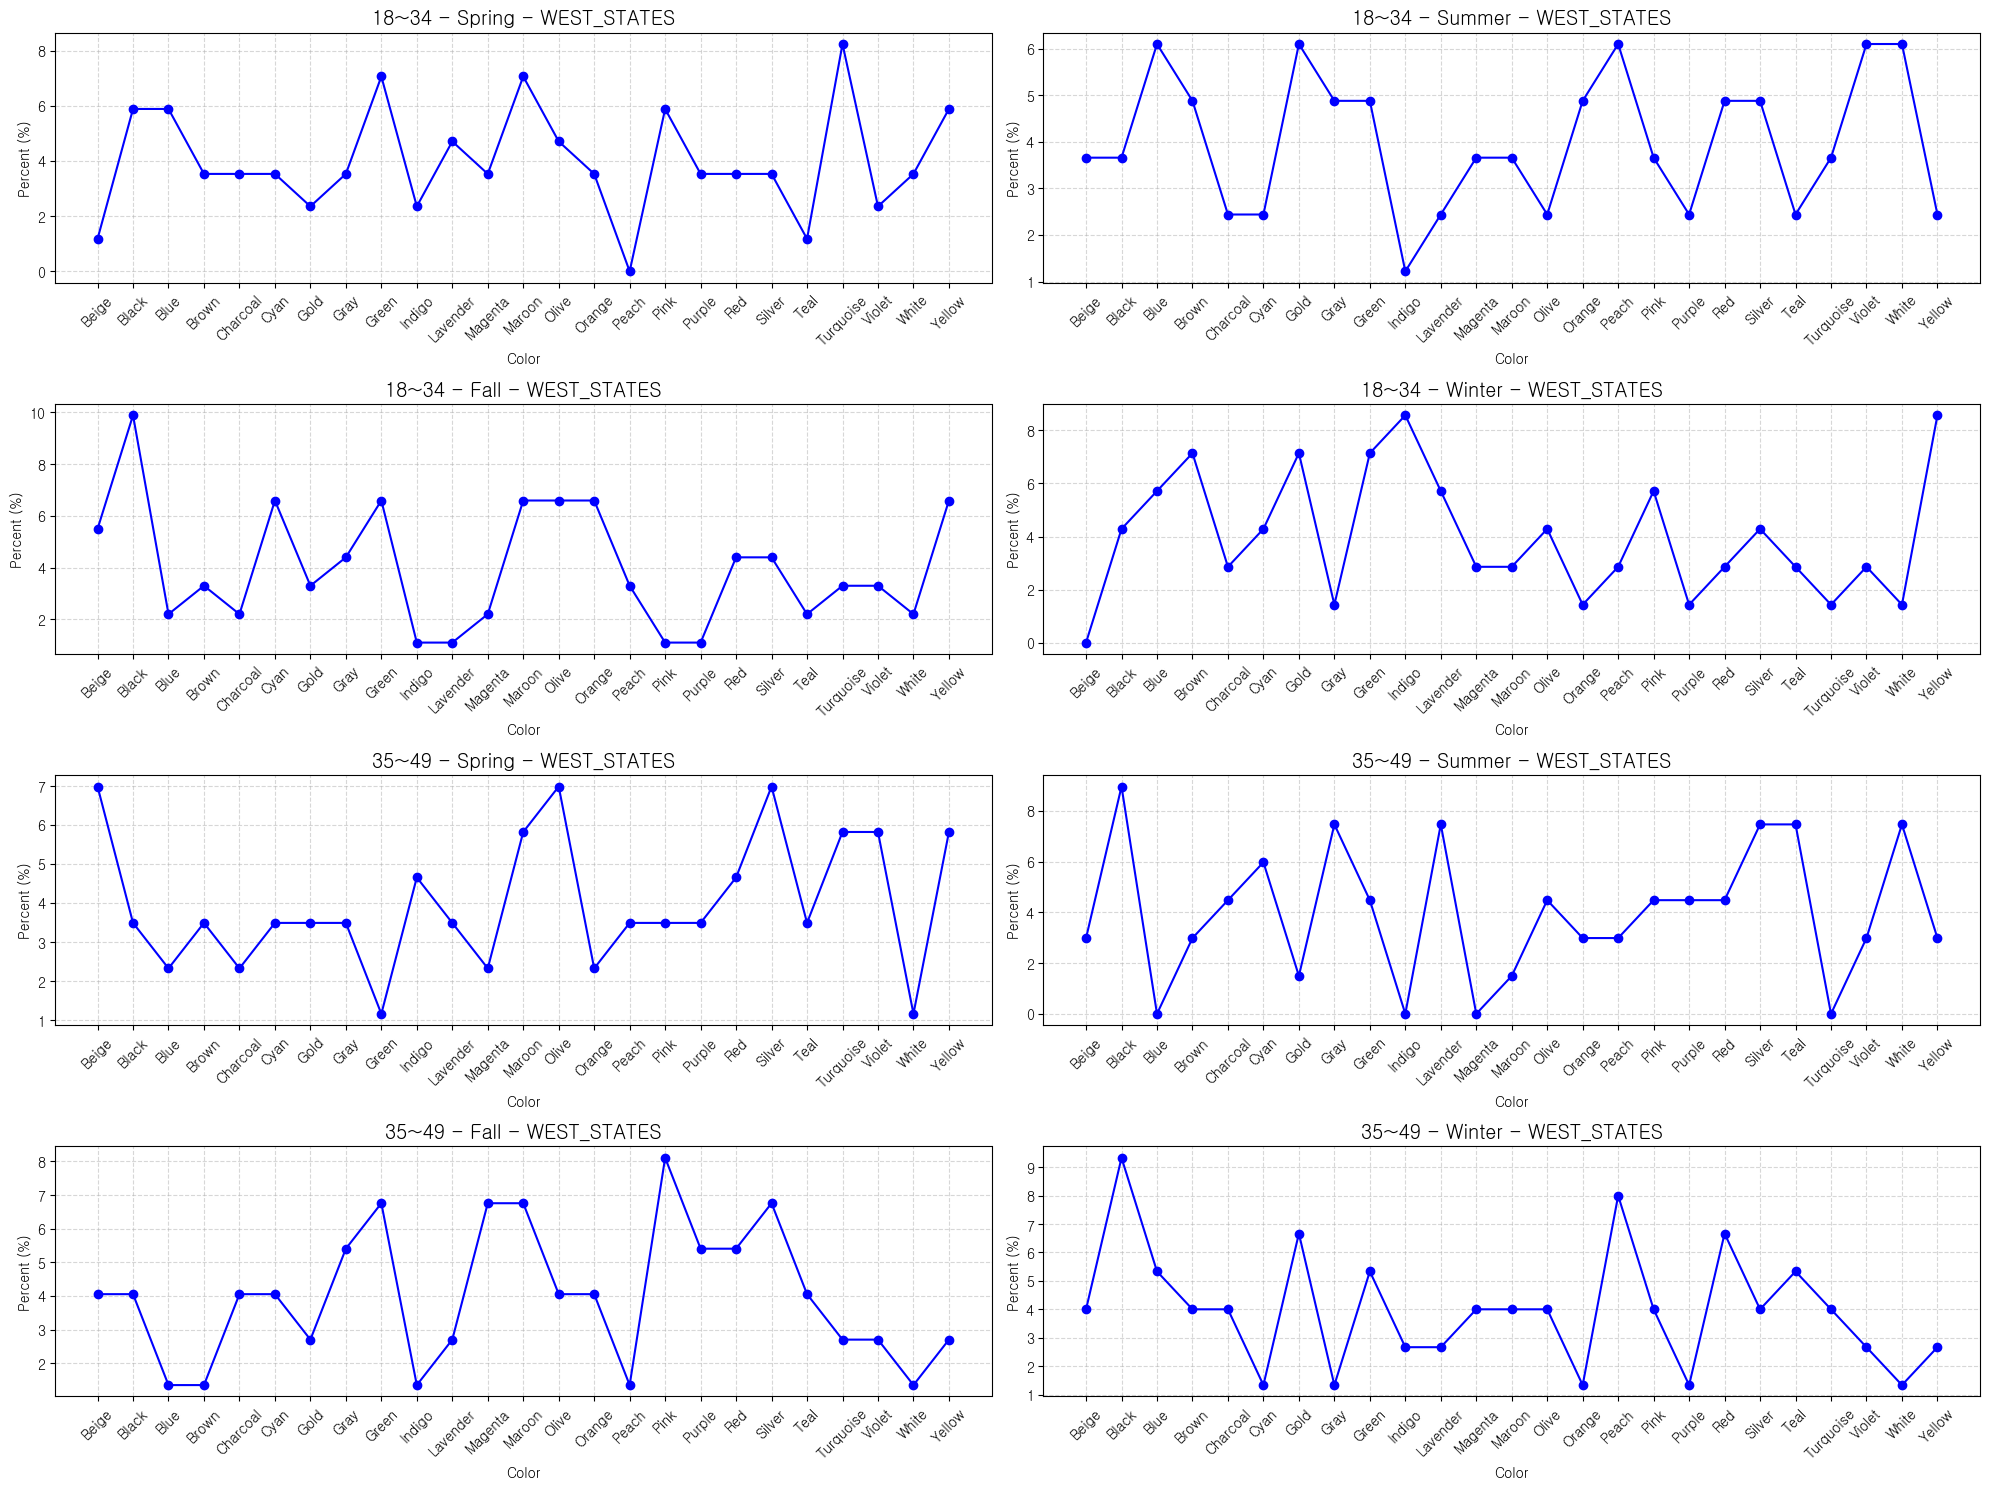

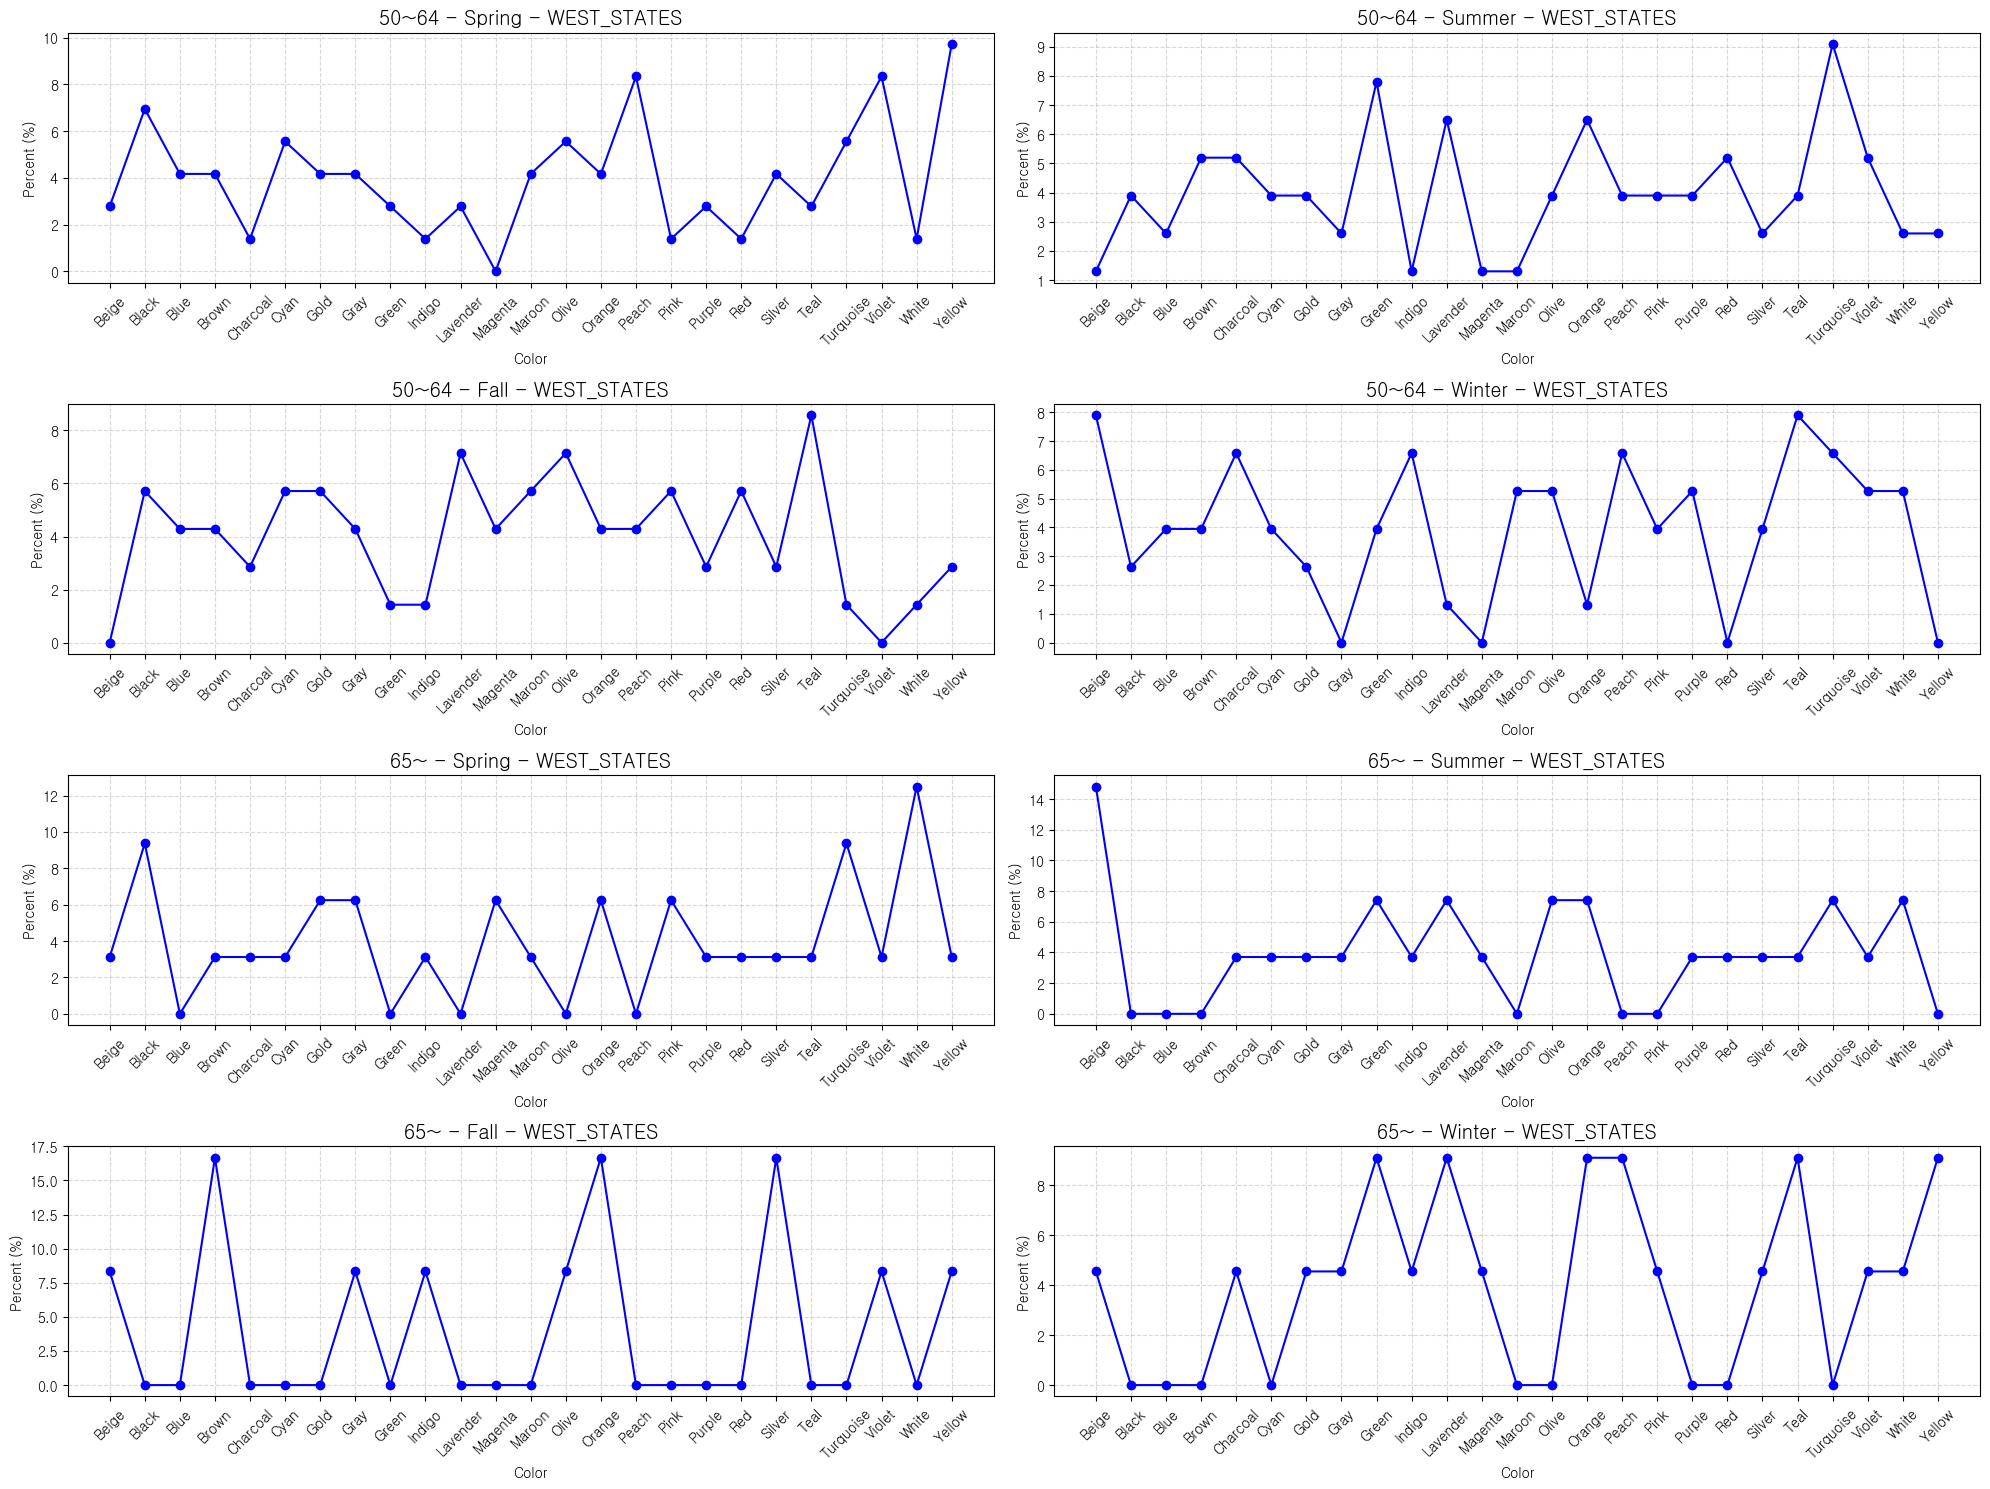

In [62]:
plt.figure(figsize=(20, 15))
plot_idx = 1
max_subplots = 8  # 한 Figure에 최대 8개만

for age in age_order:
    for season in season_order:
        age_season_df = age_color_gender_season_df[
            (age_color_gender_season_df['Age_cut'] == age) &
            (age_color_gender_season_df['Season'] == season) &
            (age_color_gender_season_df['Region'] == '서부')
        ].dropna(subset=['Age_cut', 'Color', 'Gender', 'Season', 'Color_Count'])
        
        if age_season_df.empty:
            continue
        
        # Color별 합계
        colors = age_season_df.groupby('Color')['Color_Count'].sum()
        
        # 퍼센트 계산
        percent = colors / colors.sum() * 100
        
        # subplot 범위 초과 시 새 Figure
        if plot_idx > max_subplots:
            plt.tight_layout()
            plt.show()
            plt.figure(figsize=(20, 15))
            plot_idx = 1
        
        plt.subplot(4, 2, plot_idx)
        plt.plot(colors.index, percent.values, marker='o', linestyle='-', color='blue')
        plt.xticks(rotation=45)
        plt.xlabel('Color')
        plt.ylabel('Percent (%)')
        plt.title(f'{age} - {season} - WEST_STATES', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        
        plot_idx += 1

plt.tight_layout()
plt.show()

### 서부지역의 나이대별, 계절별 색상선호도를 꺾은 선 그래프로 나타냈다.

- 18~34세에서 색상 분포가 가장 다양하다.

- 18~34세, 50~64세는 분포가 고른편인 반면, 65세 이상에선 아예 고르지 않은 색상이 많다.

- 65세 이상에서 색의 가짓수가 적고 특정색에 대한 선호가 다른 나이대에 비해 집중되고 있다는 것을 쉽게 알 수 있다.

In [63]:
westList = ['Alaska', 'Arizona', 'Nevada', 'Idaho', 'Colorado', 'Hawaii']

#east_series = pd.Series(eastList)


shopping_df['West_States_List'] = shopping_df['Location'].apply(lambda x : x if x in westList else None)
# Location을 매개변수로 받는다.  x가 eastList에 포함되어 있으면 x를 반환하고, 아니면 빈문자열('')을 반환한다.

west_shopping_df = shopping_df[shopping_df['Region']=='서부'].copy()

sampled_westshopping_df = (
    west_shopping_df.groupby('Location', group_keys=False)
    .apply(lambda x: x.sample(n=65, random_state=42) if len(x) >= 65 else x)
)


color_season_location_weststate_df = (sampled_westshopping_df.groupby(['Color', 'Season', 'West_States_List'])
                                    .size()
                                    .reset_index(name='Count')
                                    .dropna(subset=['West_States_List']))


season_order = ['Spring', 'Summer', 'Fall', 'Winter']


plt.figure(figsize=(100, 100))


plot_idx = 1


for west in westList:
    weststate_color = color_season_location_weststate_df[color_season_location_weststate_df['West_States_List'] == west].dropna(subset=['Season'])
    
    if weststate_color.empty:
        continue
    
    values = weststate_color['Count']
    labels = weststate_color['Color']
    colors = weststate_color.groupby('Color')['Count'].sum()
    
    #persent = value/(colors['Count'].sum()) * 100
    
    
    colorList = [custom_color_palette[color] for color in colors.index]
    
    top3_idx = np.argsort(colors.values)[-3:]
    
    top3_values = colors.values[top3_idx]
    
    top3_persent = top3_values/(colors.values.sum()) * 100
    
    explode = [0.2 if i in top3_idx else 0 for i in range(len(colors.index))]

    plt.subplot(3, 2, plot_idx)
    
    
    wedges, texts, autotexts = plt.pie(colors.values, wedgeprops={'width' : 0.3}, colors = colorList,
            explode=explode, autopct='%.1f%%', labels=[label if value > 0 else '' for label, value in zip(colors.index, colors.values)])
    
    
    
    # 라벨(색상 이름) / 퍼센트 폰트 크기 조정
    for t in texts:
        t.set_fontsize(30)
    for a in autotexts:
        a.set_fontsize(25)
            
        
    plt.title(f"{west} Color", fontsize=40, pad=40)  # 제목 추가
        
        
    
    
    
    
    plot_idx += 1
    
plt.tight_layout(pad=3.0)
    

plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_6668\2204383302.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=65, random_state=42) if len(x) >= 65 else x)


### 서부 지역의 매출 상위 3개, 하위 3개의 원형 그래프

- 색상이 다양하게 분포하는 편이며, 특별히 두드러지는 점을 발견하지 못했다.

### 10. 최종요약/인사이트 도출

### 남성이 구매수가 높으므로 남성을 타겟해야 한다.
- 남성의 구매수가 여성의 2배 가량이기 때문이다.

### 35~49세 구간의 색상 선호
- 겨울을 제외하곤 silver색상의 선호도가 좋았다.
- black 색상도 여름, 겨울 선호 색상이다.
- silver, black 상품에 신경써야 한다.

### 노년층에서 색 다양성이 크게 감소하고 특정색에 선호 색상이 크게 몰린다.
- 가을에 특히 두드러지는 특징이며 특정 색상으로 선호색이 집중되는 현상이 발생한다.
- 여름과 겨울 또한 마찬가지이며 다른 나이대에 비해 선호 색상 집중이 확연하다.
- 노년층의 선호색상을 빠르게 파악하여 해당 색깔에 집중하는 편이 좋다.


